# Análisis de Redes Sociales y Productividad

Este análisis explora cómo distintos factores como el uso de redes sociales, el estrés, el sueño, y el uso de herramientas digitales afectan la productividad de las personas.

Dataset: `social_media_vs_productivity.csv`


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visual style
sns.set_theme(style="whitegrid")
%matplotlib inline


In [4]:
# Path
csv_path = "../data/social_media_vs_productivity.csv"


# Load
df = pd.read_csv(csv_path)

# Convert booleans
df['uses_focus_apps'] = df['uses_focus_apps'].astype(bool)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(bool)

# Convert categoricals
categorical_cols = ['gender', 'job_type', 'social_platform_preference']
df[categorical_cols] = df[categorical_cols].astype("category")

# Clean nulls
df.dropna(subset=["daily_social_media_time", "actual_productivity_score"], inplace=True)
df["coffee_consumption_per_day"].fillna(0, inplace=True)
df["breaks_during_work"].fillna(df["breaks_during_work"].median(), inplace=True)

df.head()


/tmp/ipykernel_208851/1363051778.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["coffee_consumption_per_day"].fillna(0, inplace=True)
/tmp/ipykernel_208851/1363051778.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
5,38,Male,Finance,1.512568,Twitter,50,6.429312,NaN,4.081026,5.0,5.515251,1.518612,5,False,True,5,2,0.000000,4.568728
6,56,Female,Unemployed,4.381070,TikTok,60,3.902309,6.420989,5.976408,7.0,7.549849,2.252624,4,False,False,4,20,24.084905,5.501373
7,36,Female,Education,4.089168,Twitter,49,6.560467,2.681830,2.446927,4.0,6.325507,0.747998,2,False,False,4,29,8.419648,3.444376


## Matriz de correlación

Este gráfico muestra la relación estadística entre todas las variables numéricas del conjunto de datos. Las celdas más oscuras y con valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa respectivamente.


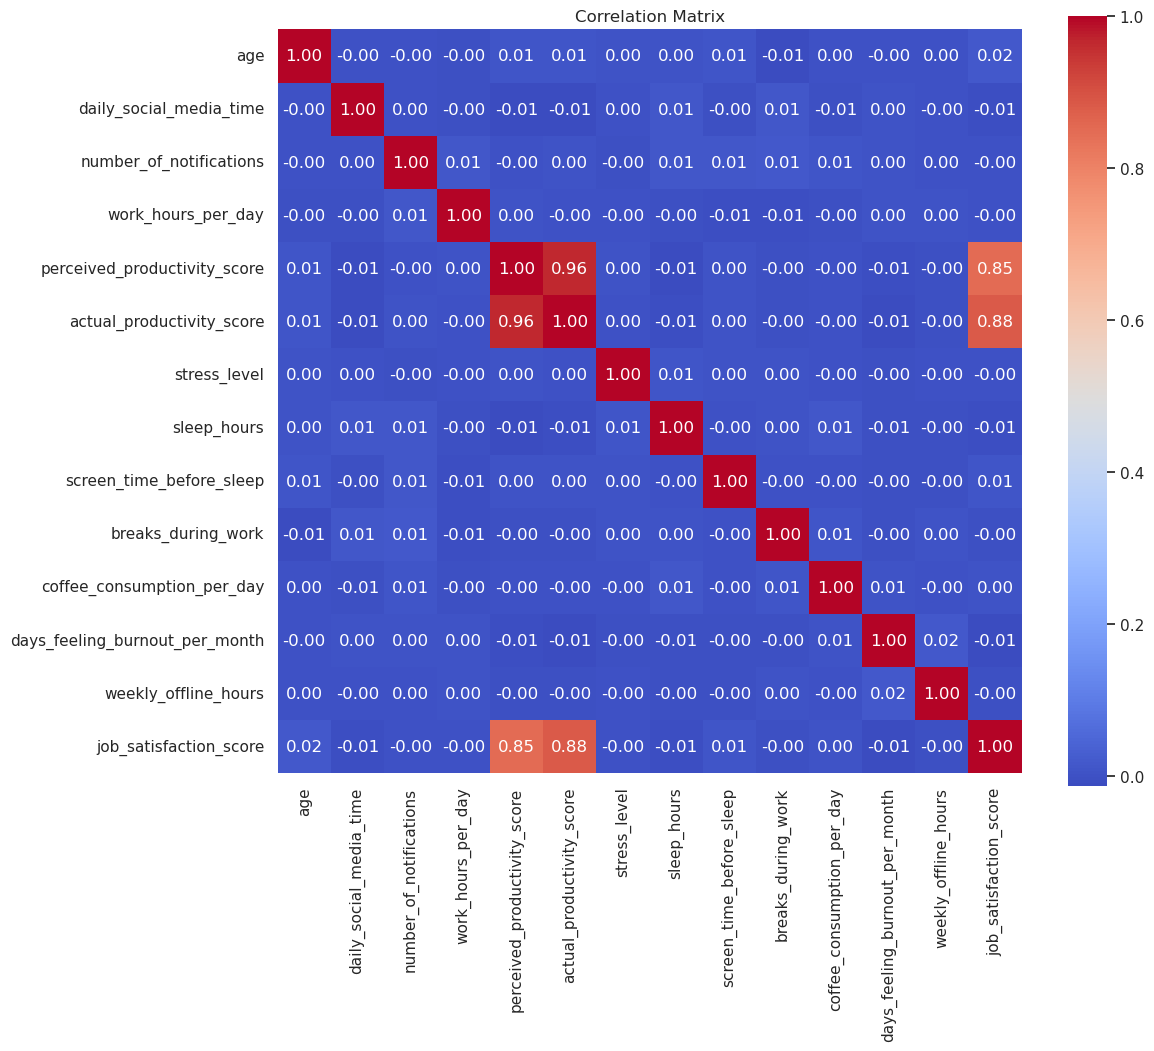

In [11]:
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


## Tiempo en redes sociales vs productividad real

Este diagrama de dispersión muestra cómo varía la productividad real en función del tiempo diario que una persona pasa en redes sociales.



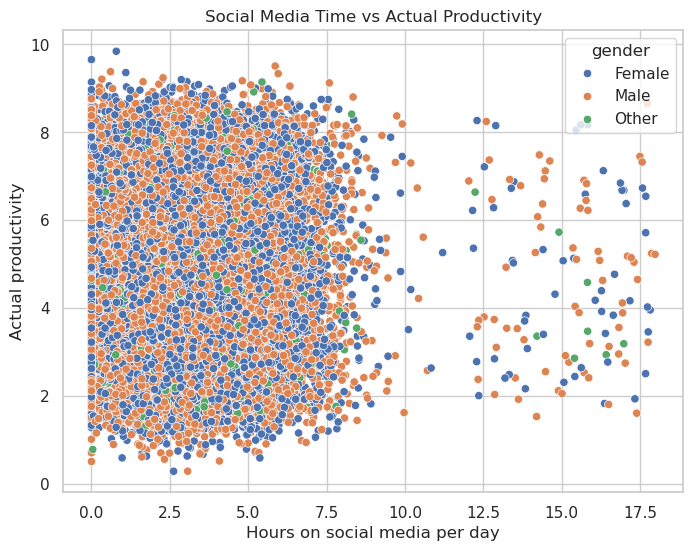

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="daily_social_media_time", y="actual_productivity_score", hue="gender")
plt.title("Social Media Time vs Actual Productivity")
plt.xlabel("Hours on social media per day")
plt.ylabel("Actual productivity")
plt.show()


## Productividad según plataforma social preferida

Este boxplot compara la productividad real de los usuarios agrupados según su red social preferida.


/tmp/ipykernel_208851/242431087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="social_platform_preference", y="actual_productivity_score", palette="pastel")


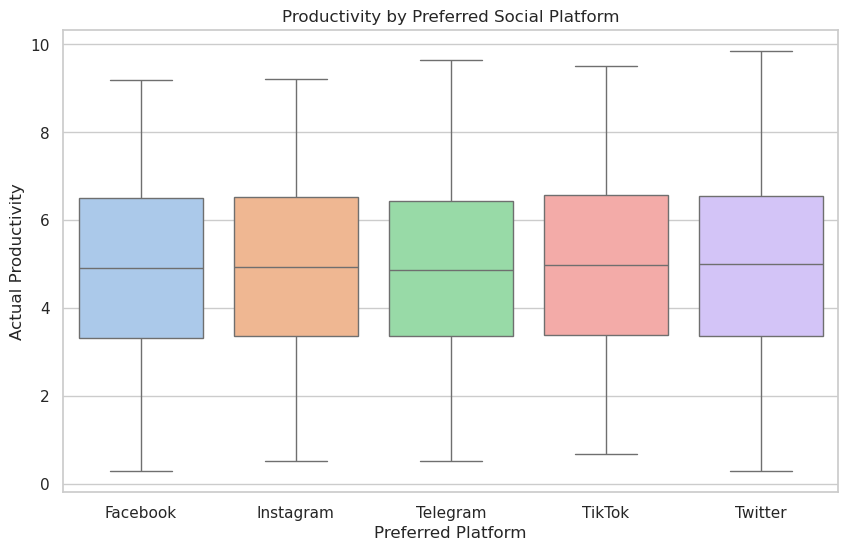

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="social_platform_preference", y="actual_productivity_score", palette="pastel")
plt.title("Productivity by Preferred Social Platform")
plt.xlabel("Preferred Platform")
plt.ylabel("Actual Productivity")
plt.show()


## Uso de apps de enfoque vs productividad

Este gráfico muestra la productividad real comparando personas que usan o no aplicaciones diseñadas para ayudar a concentrarse.



/tmp/ipykernel_208851/866726379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="uses_focus_apps", y="actual_productivity_score", palette="Set2")


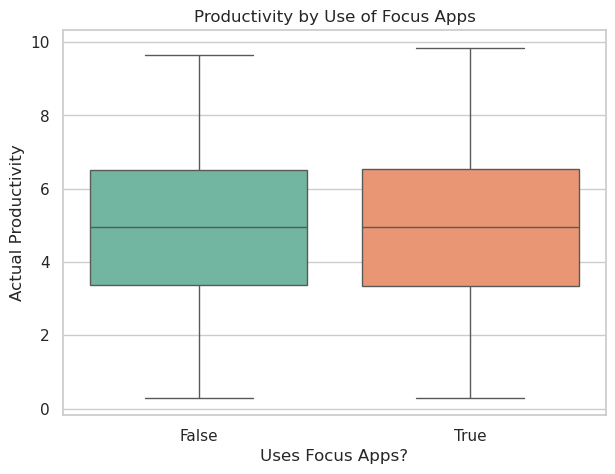

In [14]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="uses_focus_apps", y="actual_productivity_score", palette="Set2")
plt.title("Productivity by Use of Focus Apps")
plt.xlabel("Uses Focus Apps?")
plt.ylabel("Actual Productivity")
plt.show()


## Número de notificaciones vs productividad

Este scatterplot muestra cómo la cantidad diaria de notificaciones que una persona recibe se relaciona con su nivel de productividad real.


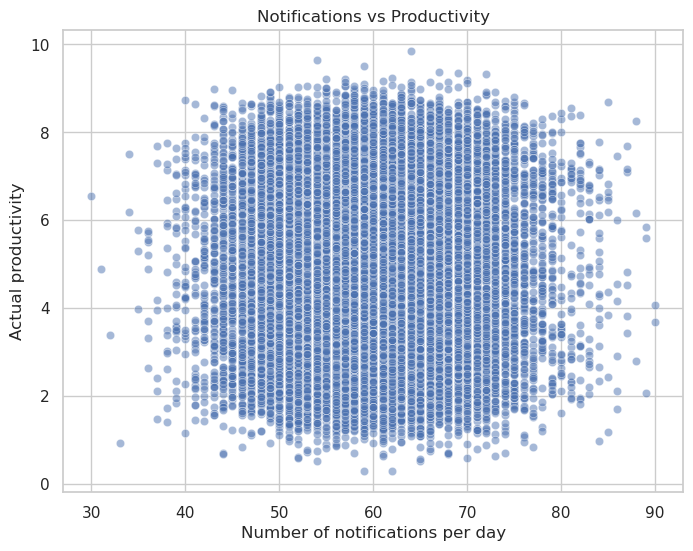

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="number_of_notifications", y="actual_productivity_score", alpha=0.5)
plt.title("Notifications vs Productivity")
plt.xlabel("Number of notifications per day")
plt.ylabel("Actual productivity")
plt.show()


## Comparación entre satisfacción laboral y productividad percibida/real

Los siguientes gráficos muestran la relación entre la satisfacción laboral y la productividad:

- El primer gráfico representa la relación entre la satisfacción laboral y la productividad percibida.

- El segundo gráfico representa la relación entre la satisfacción laboral y la productividad real.

Se utiliza una regresión lineal (regplot) para visualizar la tendencia entre las variables. Ambos gráficos comparten el mismo eje Y para facilitar la comparación.


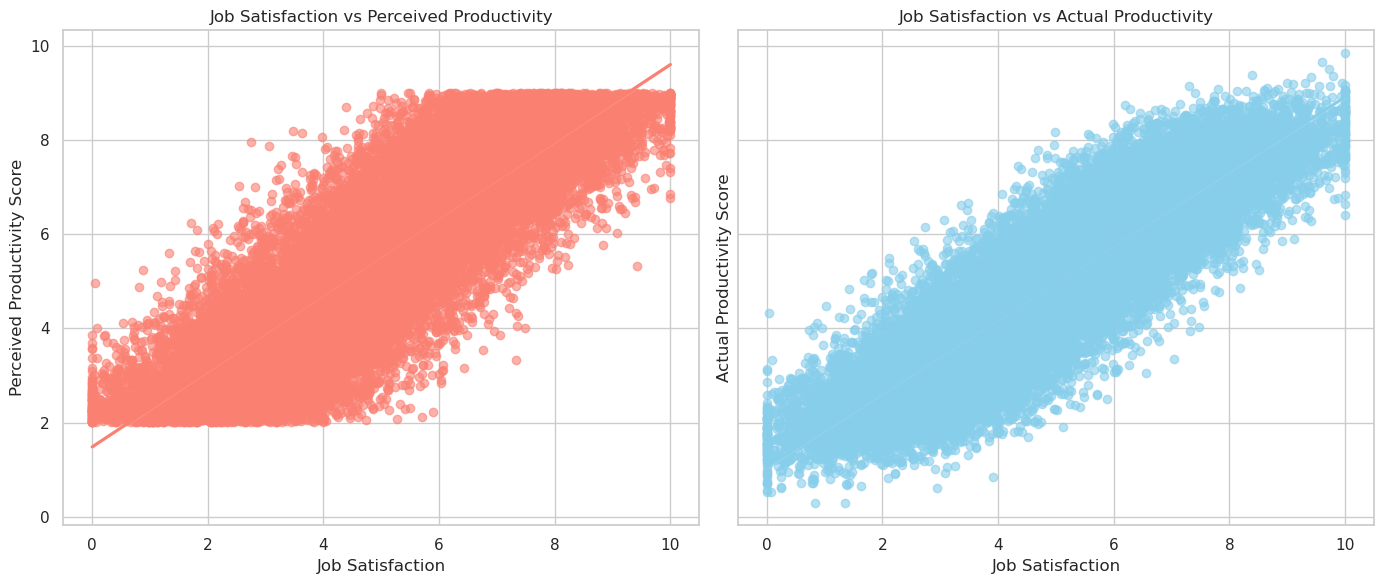

In [16]:
# Create figures
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Perceived productivity vs job satisfaction
sns.regplot(ax=axes[0], data=df, x="job_satisfaction_score", y="perceived_productivity_score", scatter_kws={"alpha": 0.6}, color="salmon")
axes[0].set_title("Job Satisfaction vs Perceived Productivity")
axes[0].set_xlabel("Job Satisfaction")
axes[0].set_ylabel("Perceived Productivity Score")

# Actual productivity vs job satisfaction
sns.regplot(ax=axes[1], data=df, x="job_satisfaction_score", y="actual_productivity_score", scatter_kws={"alpha": 0.6}, color="skyblue")
axes[1].set_title("Job Satisfaction vs Actual Productivity")
axes[1].set_xlabel("Job Satisfaction")
axes[1].set_ylabel("Actual Productivity Score")

plt.tight_layout()
plt.show()